# supervised learning

The objective of this project is to evaluate the performance of various supervised learning techniques for classification on a real-world dataset. 
Classification models are trained and tested using the breast cancer dataset available in the sklearn library.

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets
import warnings
warnings.filterwarnings("ignore")

# Loading Dataset
_____

In [ ]:
# loading data from sklearn
breastcancer_dataset = sklearn.datasets.load_breast_cancer()

In [6]:
# loading data in data frame
data_frame = pd.DataFrame(breastcancer_dataset.data, columns = breastcancer_dataset.feature_names)

In [7]:
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
# adding the 'target' column to data frame
data_frame['diagnosis'] = breastcancer_dataset.target

In [9]:
data_frame.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [10]:
# number of rows and columns in dataset.
data_frame.shape

(569, 31)

In [11]:
# information of dataset.
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [13]:
# checking for missing values
data_frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
diagnosis                  0
dtype: int64

In [15]:
data_frame.duplicated().sum()

np.int64(0)

In [16]:
#statistical measures about the data.
data_frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [17]:
# checking the distribution of Target Variable.
data_frame['diagnosis'].value_counts()

diagnosis
1    357
0    212
Name: count, dtype: int64

* 1--> Benign (non cancerous)
* 0--> Malignant(cancerous)

In [18]:
data_frame.groupby('diagnosis').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


Note:
* The target is categorical and it has only 2 values hence we can use models that work on binary classification
* Total Numerical Features: 30
* Total Categorical Features: 0
* There are no missing values in any columns
* There are no duplicate entries
* Considerable number of features are on different scales when compared to others
* The features with wider range or distribution should be scaled in preprocessing phase to improve model performance

# EDA
____

Since the features are continuous we might not be able to visualize relationships between each features and the target in a meaningful way. 
Instead we will focus on:

* The distribution of features
* The Skewness of features

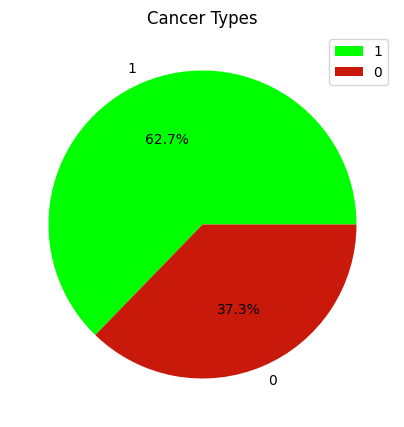

In [25]:
#information on distribution of cancer types
plt.figure(figsize=(5,5))
count=data_frame['diagnosis'].value_counts().values
index=data_frame['diagnosis'].value_counts().index
plt.pie(count, labels=index,autopct='%1.1f%%',colors=['#00FF00','#C9190B'])
plt.title('Cancer Types')
plt.legend()
plt.show()

Note:
* 62.7 % observations are non cancerous (Benign)
* 37.3 % observations are cancerous (Malignant)

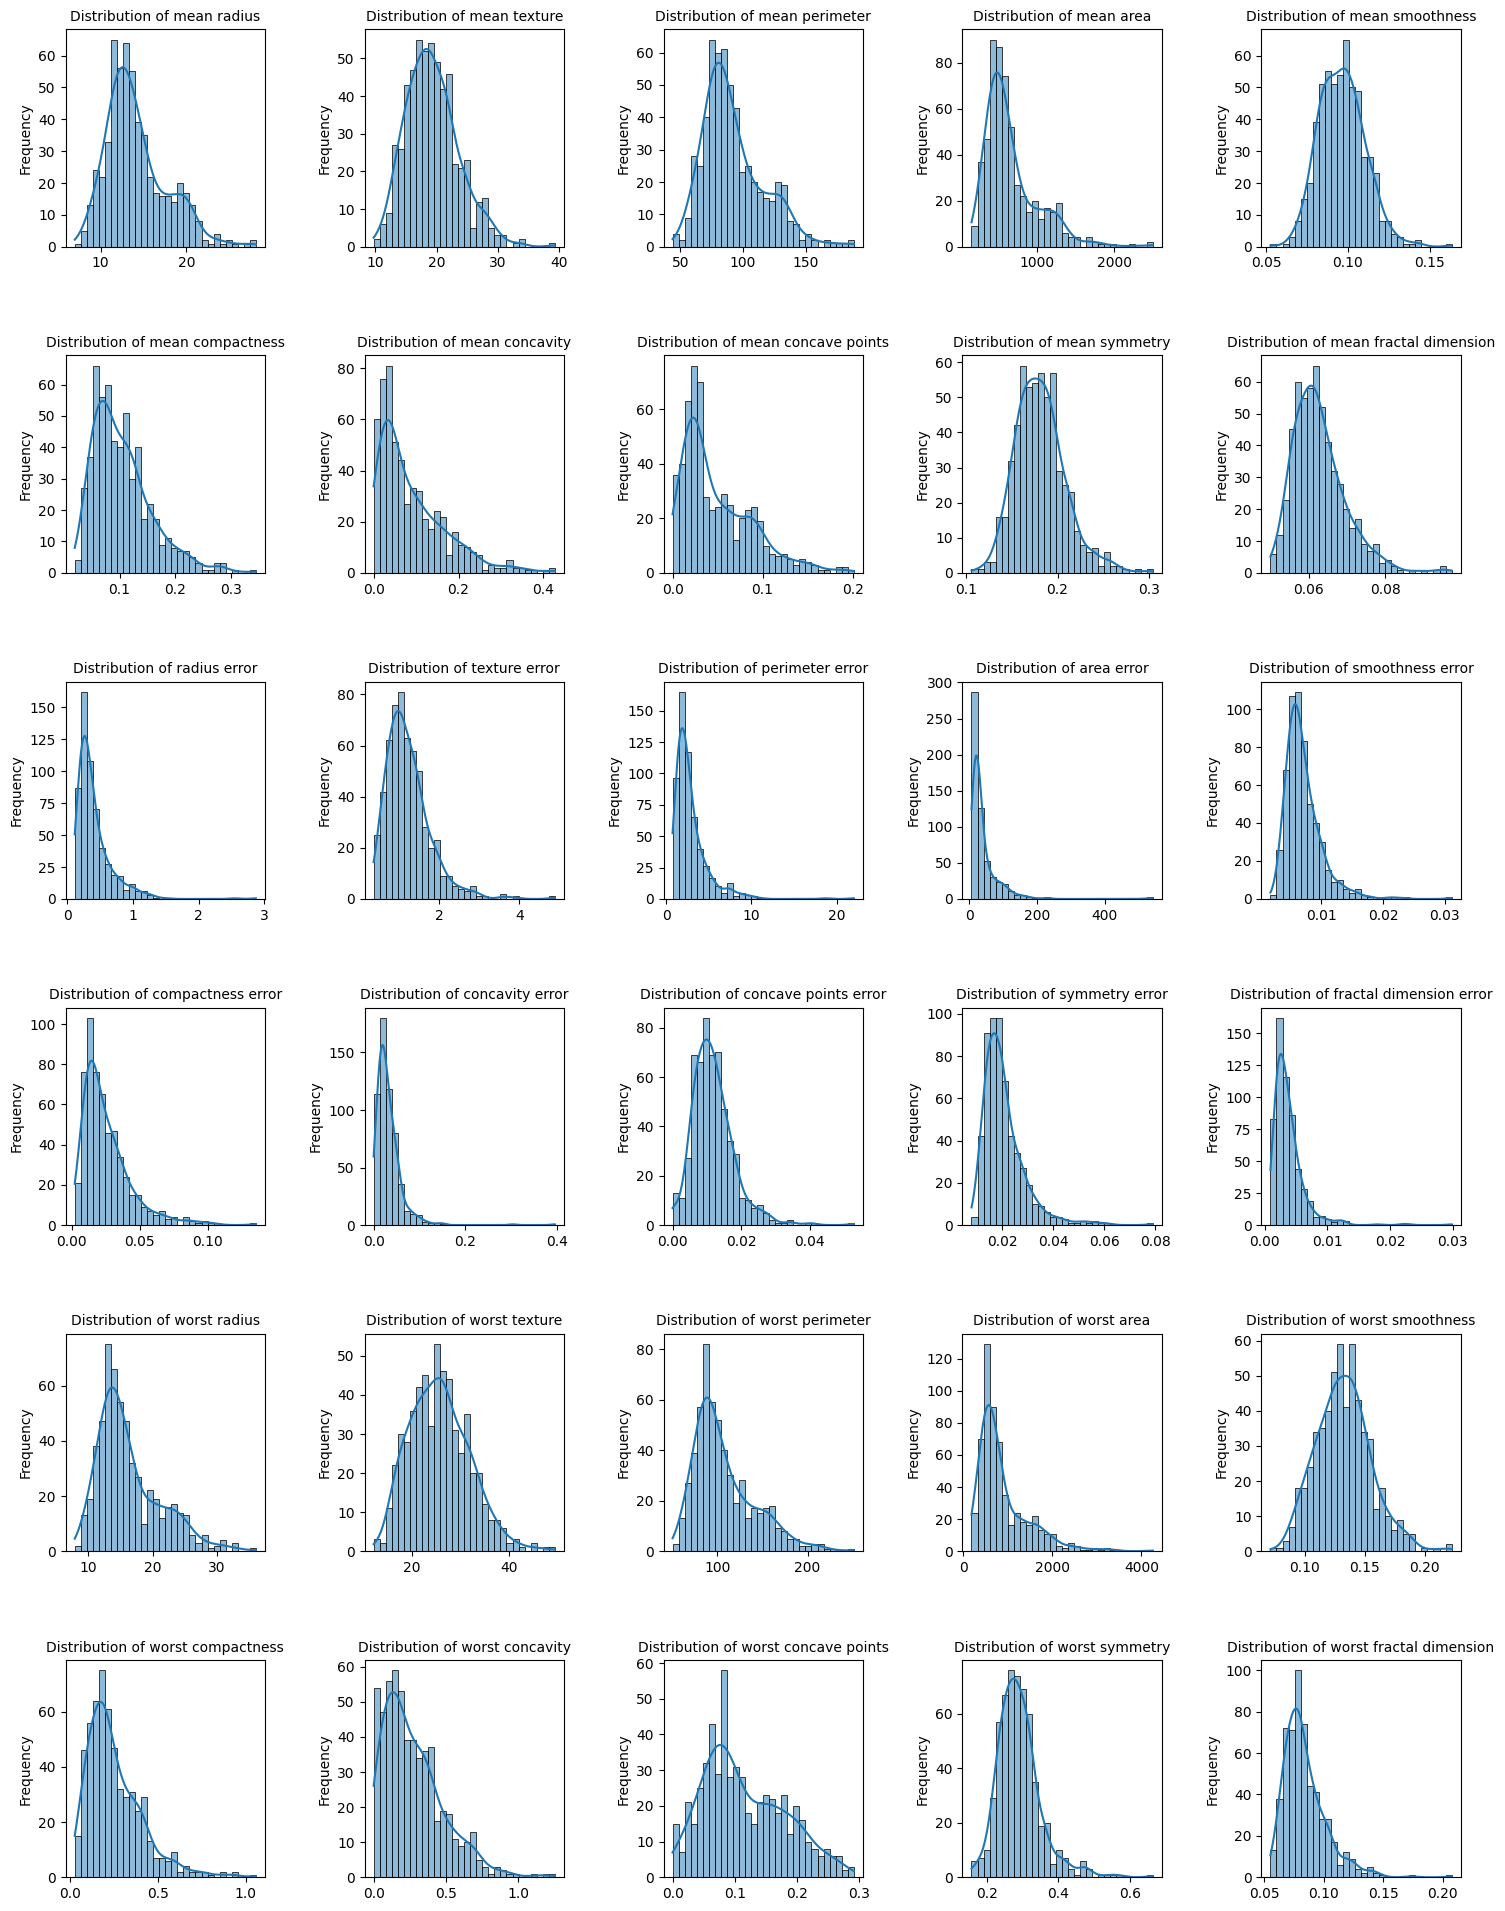

In [30]:
# graphical reprasentation of numerical columns
num_features = data_frame.columns[:-1]  # Exclude 'target' if included in the DataFrame

plt.figure(figsize=(18, 24))  
for i, feature in enumerate(num_features, 1):
    plt.subplot(6, 5, i)  
    sns.histplot(data_frame[feature],bins=30,kde=True)
    plt.title(f"Distribution of {feature}", fontsize=10)
    plt.xlabel("")
    plt.ylabel("Frequency")
plt.subplots_adjust(hspace=0.5, wspace=0.5)  
plt.show()

In [32]:
# Select numeric columns excluding the target variable
numeric_df = data_frame.select_dtypes(include=['float64', 'int64'])

# Display the resulting DataFrame
numeric_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [33]:
# Calculate skewness for each numeric column
skewness = numeric_df.skew().sort_values(ascending=True)
skewness

diagnosis                 -0.528461
worst smoothness           0.415426
mean smoothness            0.456324
worst concave points       0.492616
worst texture              0.498321
mean texture               0.650450
mean symmetry              0.725609
mean radius                0.942380
mean perimeter             0.990650
worst radius               1.103115
worst perimeter            1.128164
worst concavity            1.150237
mean concave points        1.171180
mean compactness           1.190123
mean fractal dimension     1.304489
mean concavity             1.401180
worst symmetry             1.433928
concave points error       1.444678
worst compactness          1.473555
mean area                  1.645732
texture error              1.646444
worst fractal dimension    1.662579
worst area                 1.859373
compactness error          1.902221
symmetry error             2.195133
smoothness error           2.314450
radius error               3.088612
perimeter error            3

In [19]:
# Highlight the features with high skewness (greater than 0.5 or less than -0.5)
highly_skewed = skewness[(skewness > 0.5) | (skewness < -0.5)]
print("\nHighly skewed features:")
print(highly_skewed)
print(len(highly_skewed))


Highly skewed features:
mean texture               0.650450
mean symmetry              0.725609
mean radius                0.942380
mean perimeter             0.990650
worst radius               1.103115
worst perimeter            1.128164
worst concavity            1.150237
mean concave points        1.171180
mean compactness           1.190123
mean fractal dimension     1.304489
mean concavity             1.401180
worst symmetry             1.433928
concave points error       1.444678
worst compactness          1.473555
mean area                  1.645732
texture error              1.646444
worst fractal dimension    1.662579
worst area                 1.859373
compactness error          1.902221
symmetry error             2.195133
smoothness error           2.314450
radius error               3.088612
perimeter error            3.443615
fractal dimension error    3.923969
concavity error            5.110463
area error                 5.447186
dtype: float64
26


In [35]:
# Ensure diagnosis is in numerical_columns and remove it
numerical_columns = data_frame.select_dtypes(include=['number']).columns.tolist()

# Check if 'diagnosis' is in the list, and remove it if present
if 'diagnosis' in numerical_columns:
    numerical_columns.remove('diagnosis')

# Display the resulting list to confirm
print("Numerical columns (excluding diagnosis):")
print(numerical_columns)

Numerical columns (excluding diagnosis):
['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


## Detecting & treating Outliers

In [36]:
data_cleaned = data_frame.copy()
for column in numerical_columns:
    Q1 = data_frame[column].quantile(0.25)
    Q3 = data_frame[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 0.5*IQR
    upper = Q3 + 0.5*IQR
    data_cleaned = data_frame[(data_frame[column] >= lower) & (data_frame[column] <= upper)]

print("Dataset shape after being outliers removed:",data_cleaned.shape)
print("Dataset shape before being outliers removed:",data_frame.shape)

Dataset shape after being outliers removed: (471, 31)
Dataset shape before being outliers removed: (569, 31)


* After removing outliers, the dataset shape changed from (569, 31) to (471, 31), indicating that 98 rows containing outlier values were eliminated. 
* This reduction enhances the quality of the data, allowing for more accurate analysis and modeling.

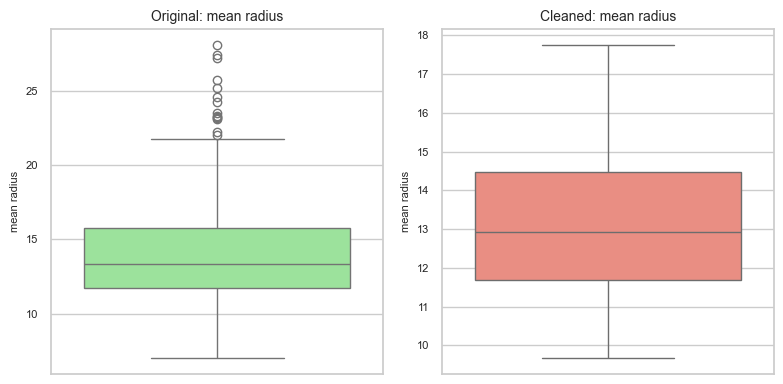

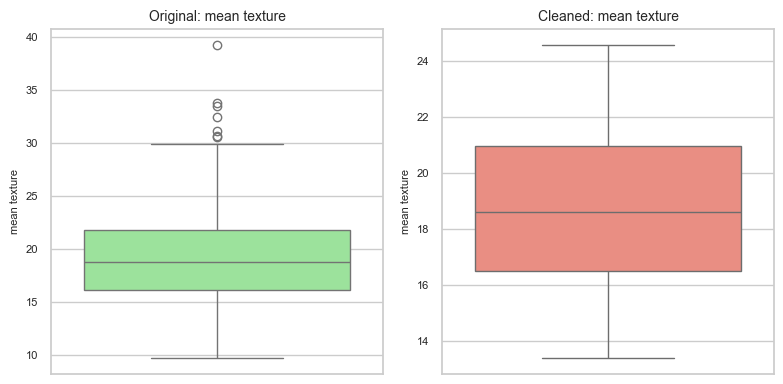

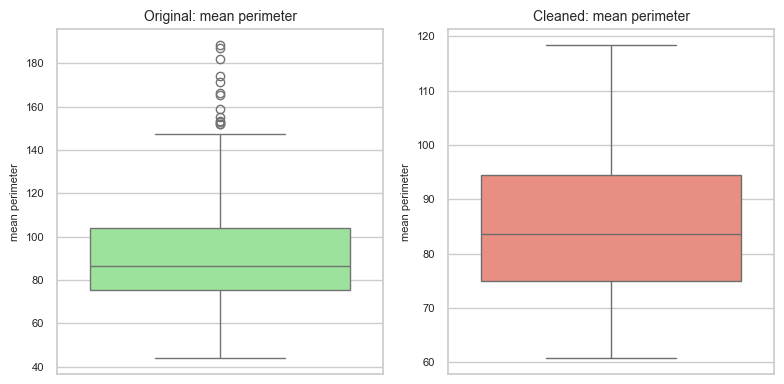

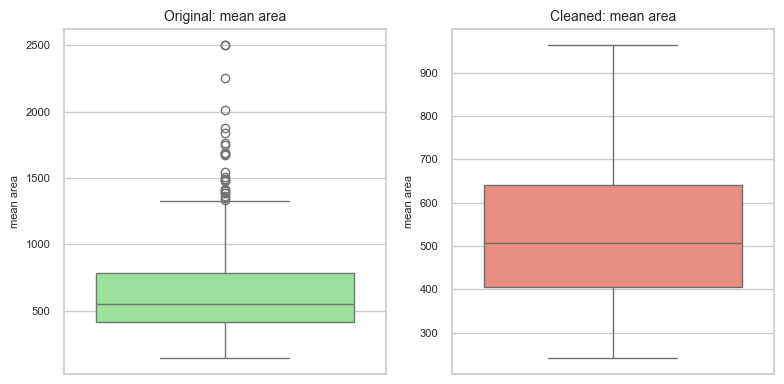

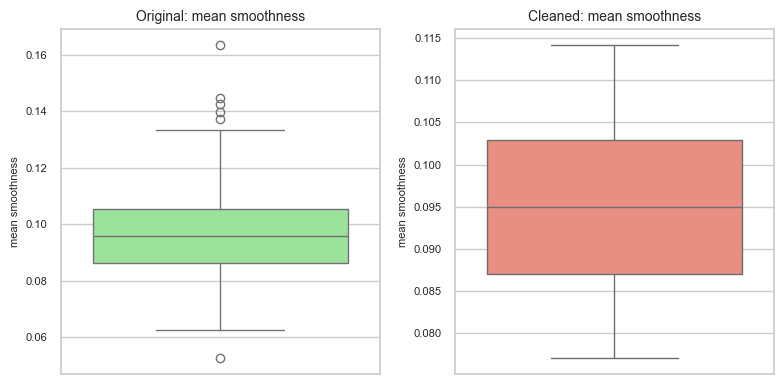

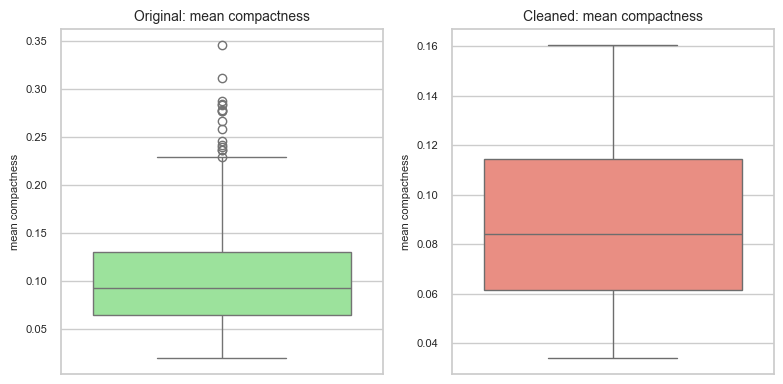

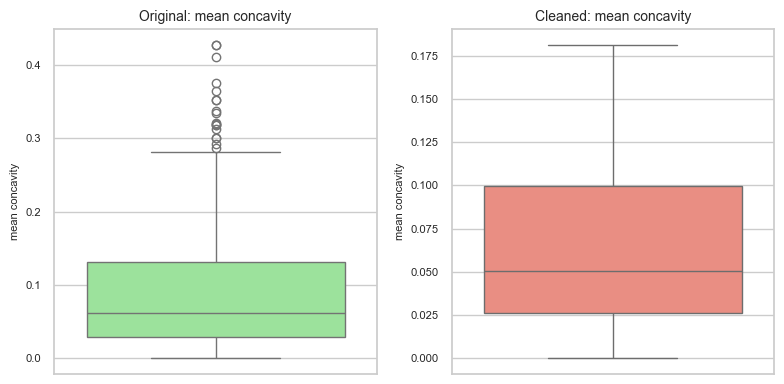

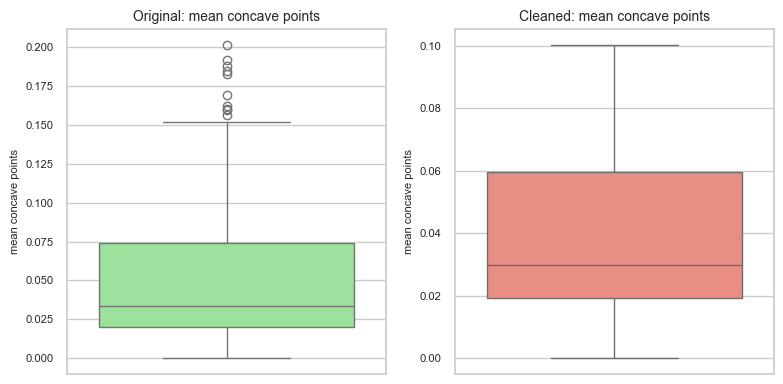

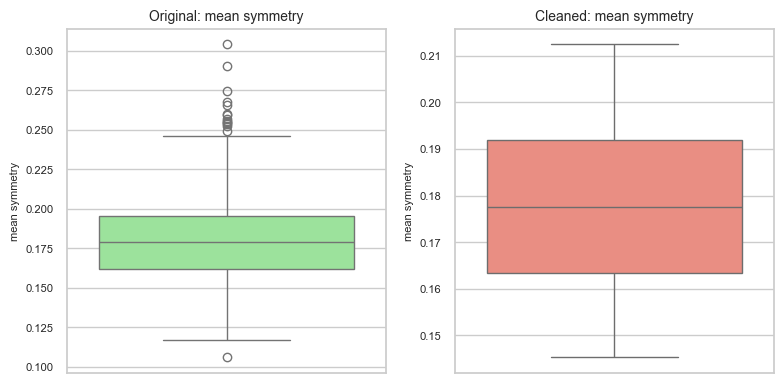

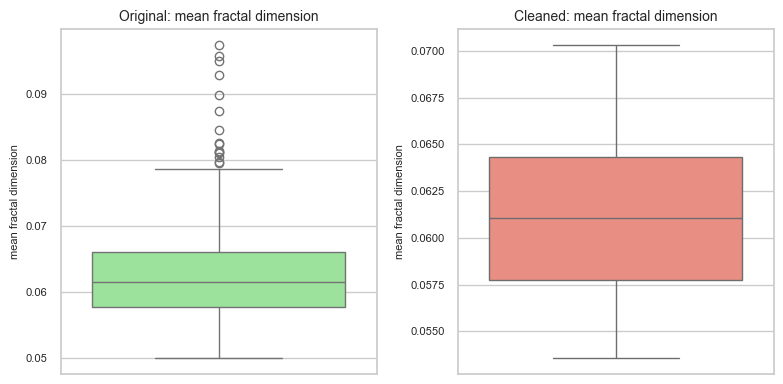

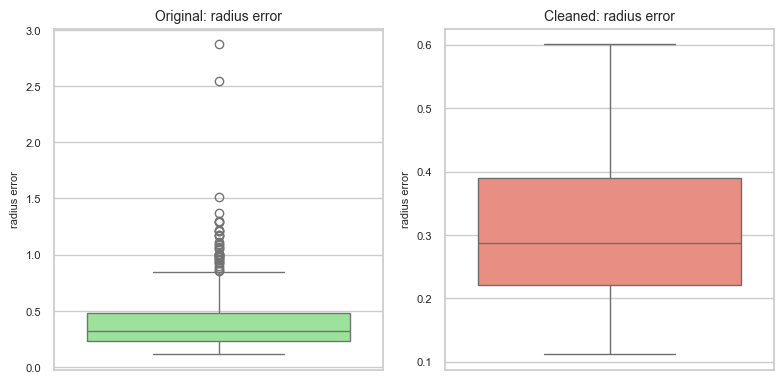

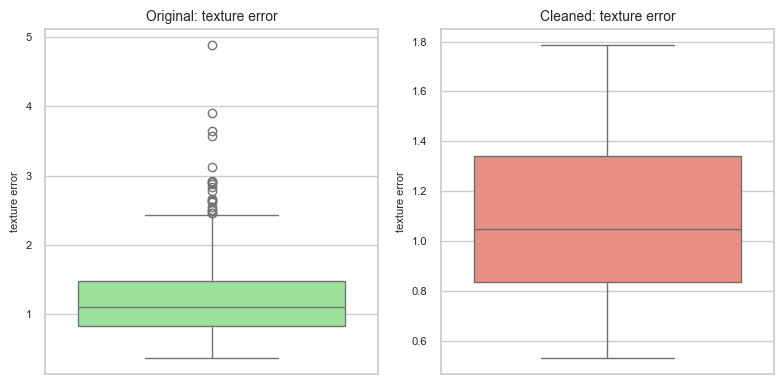

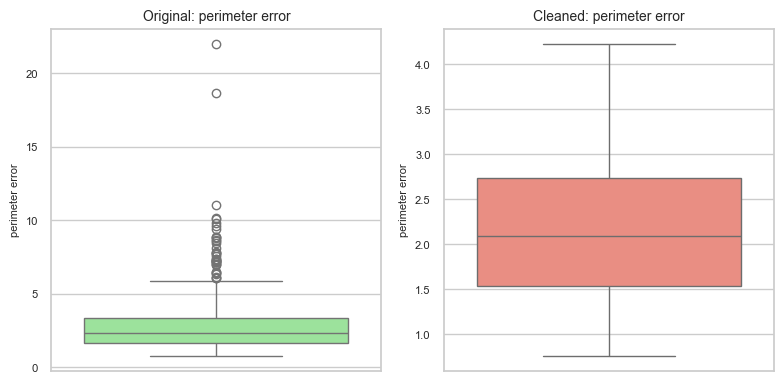

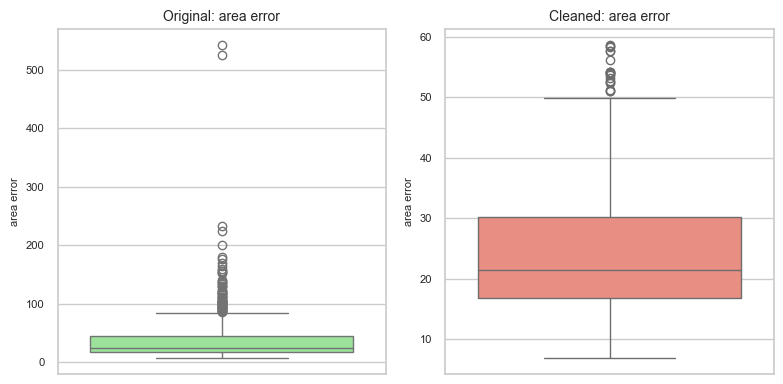

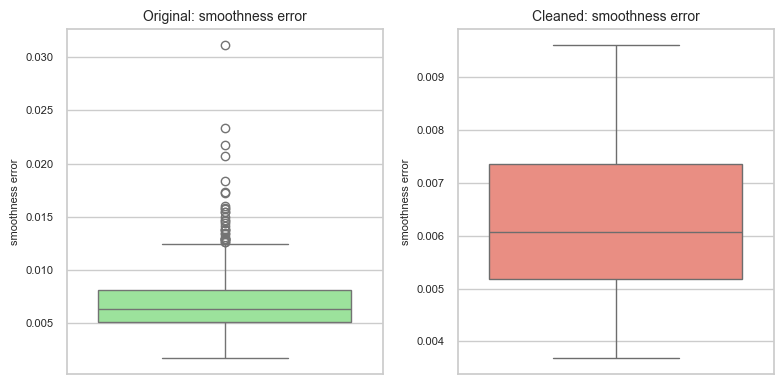

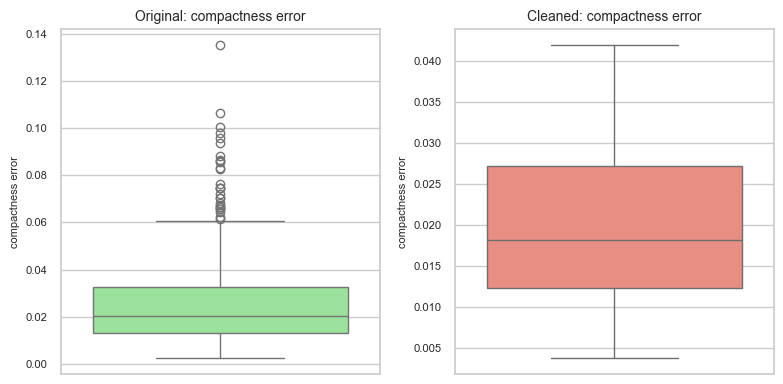

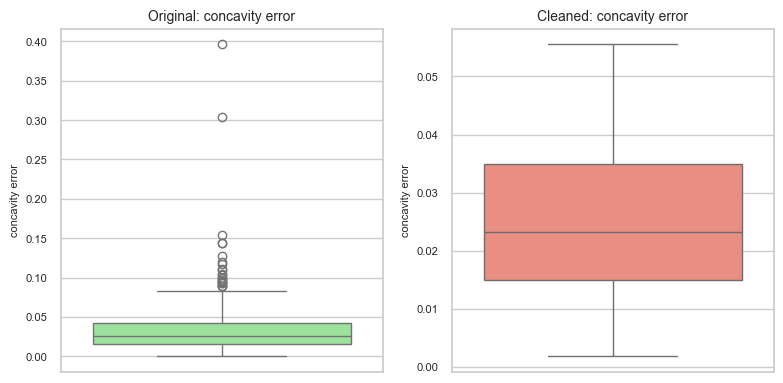

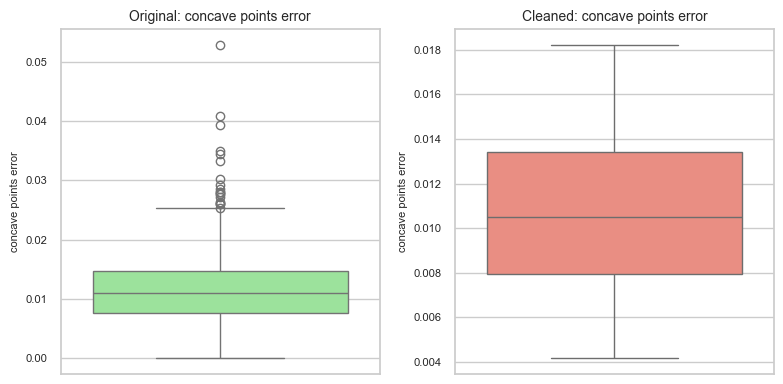

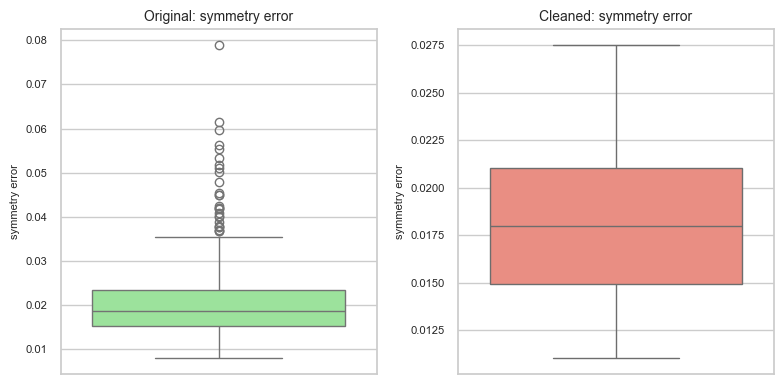

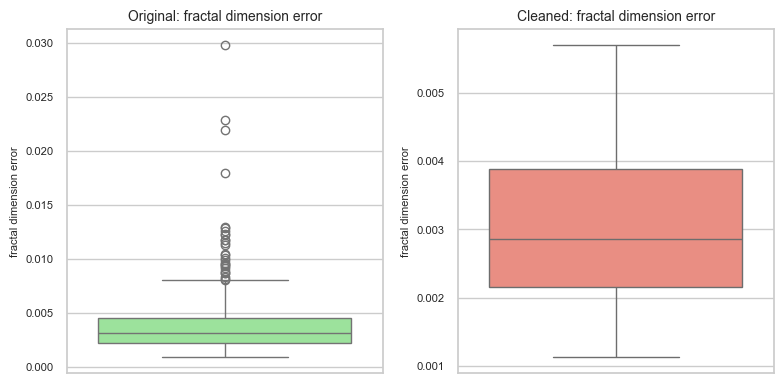

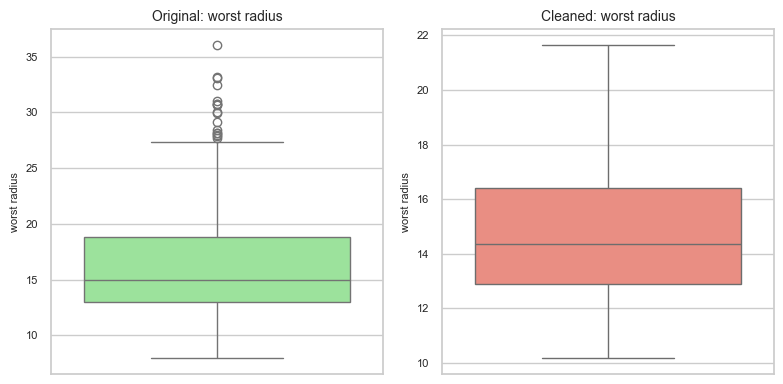

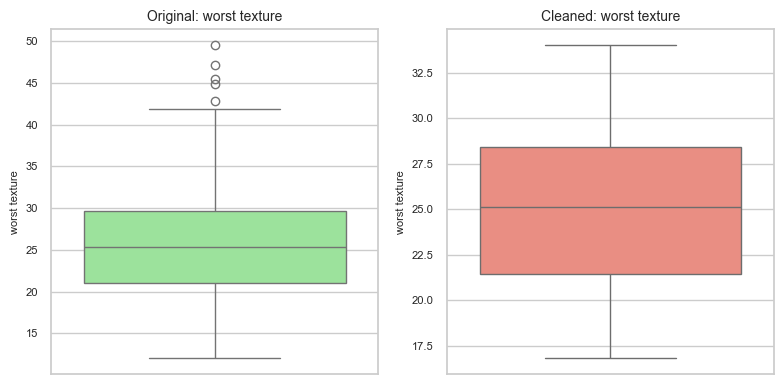

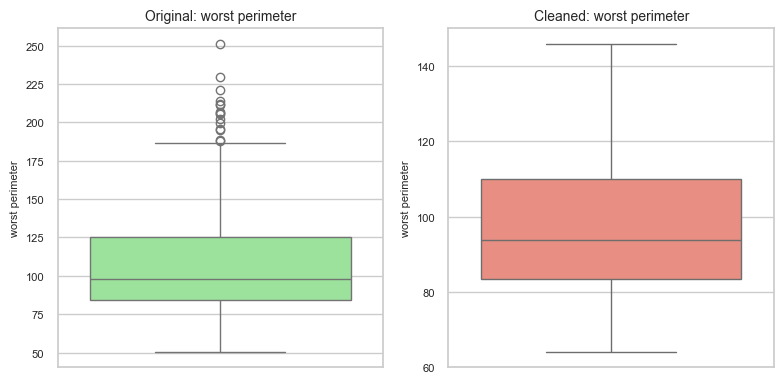

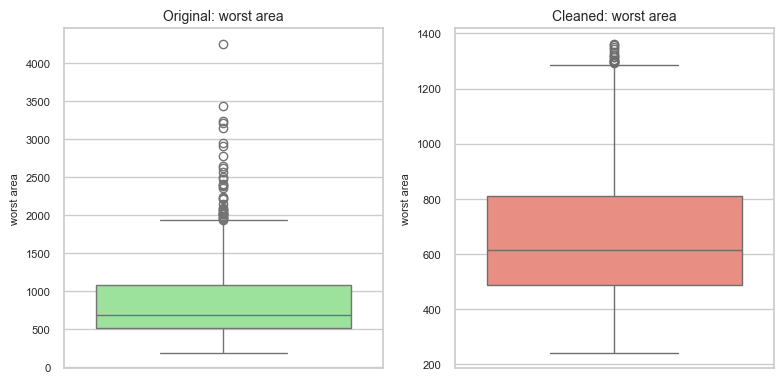

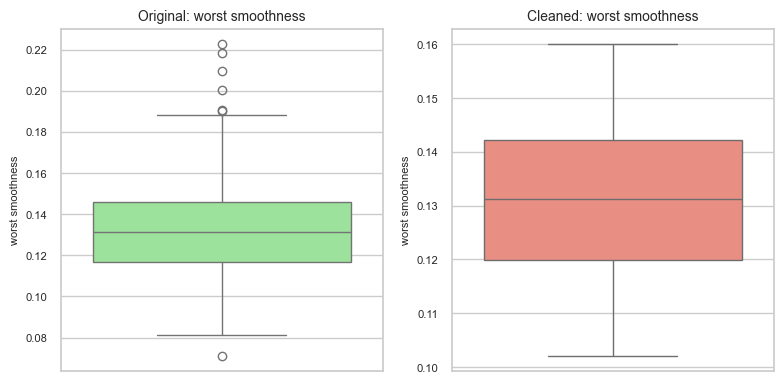

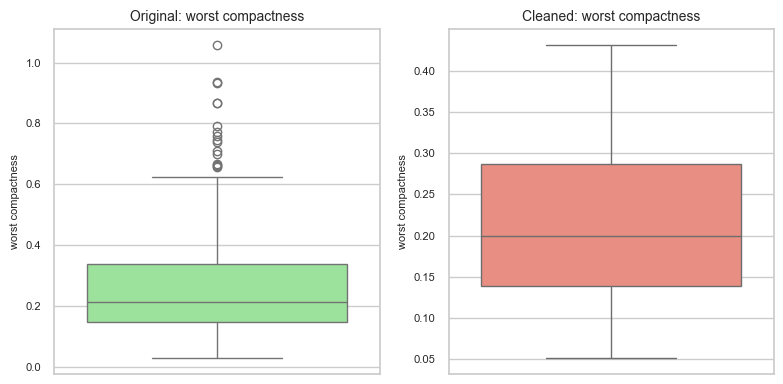

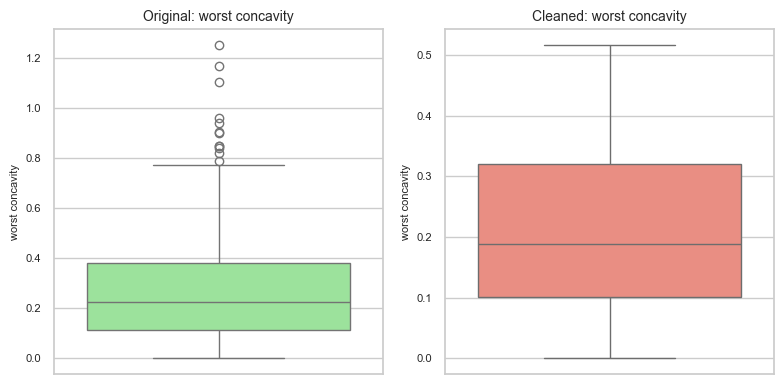

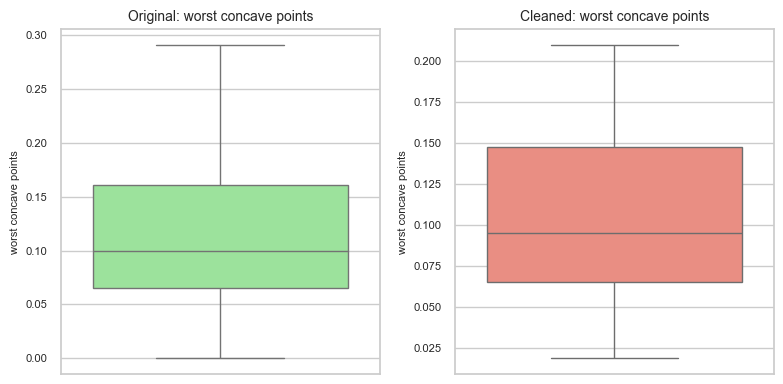

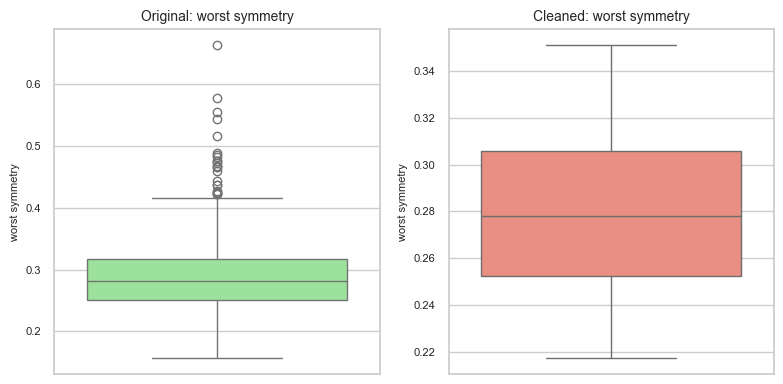

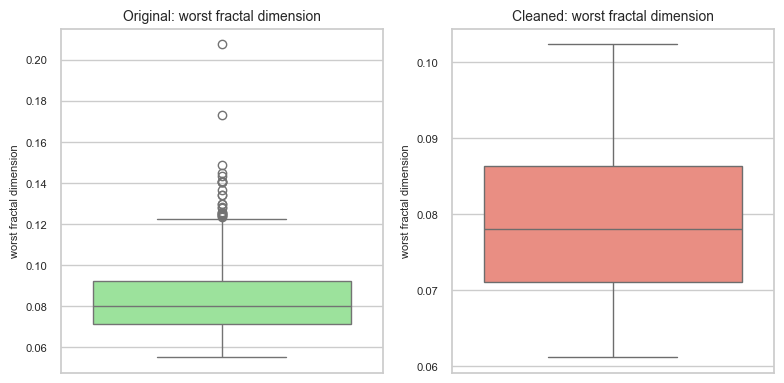

In [37]:
# Set style for Seaborn
sns.set(style="whitegrid")

# Define features for which you want to remove outliers
features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness',
            'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error',
            'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error',
            'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area',
            'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']

for feature in features:
    # Calculate Q1, Q3, and IQR
    Q1 = data_frame[feature].quantile(0.25)
    Q3 = data_frame[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 0.5 * IQR
    upper = Q3 + 0.5 * IQR
    
    # Filter data to remove outliers for the current feature
    data_cleaned = data_frame[(data_frame[feature] >= lower) & (data_frame[feature] <= upper)]

    # Create a box plot for the original data
    plt.figure(figsize=(8, 4))  # Smaller figure size
    plt.subplot(1, 2, 1)
    sns.boxplot(y=data_frame[feature], color='lightgreen')
    plt.title(f'Original: {feature}', fontsize=10)  # Smaller title font
    plt.ylabel(feature, fontsize=8)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

    # Create a box plot for the cleaned data
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data_cleaned[feature], color='salmon')
    plt.title(f'Cleaned: {feature}', fontsize=10)  # Smaller title font
    plt.ylabel(feature, fontsize=8)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

    # Show plots
    plt.tight_layout()
    plt.show()

* After outlier removal, the boxplots show a more compact and representative range of values for each feature, with improved data quality and interpretability.This refined dataset allows for more accurate modeling, as extreme values no longer distort insights or comparisons between features.

### Seperating features and Target

In [38]:
X = data_frame.drop(columns=['diagnosis'], axis=1)
y = data_frame['diagnosis']

In [40]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [41]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

# Feature Scaling 
_______
* Features need to be scaled in order to adjust their magnitude (since most classification algorithms are sensitive to the range or distribution of data). Here we use StandardScaler to scale data.

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [44]:
data_frame_scaled = pd.DataFrame(X_scaled, columns=X.columns)
data_frame_scaled['diagnosis'] = y

In [45]:
data_frame_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0


* Standardization allows the model to learn better by equalizing feature ranges, avoiding biases that arise from unbalanced ranges.

In [46]:
# Drop 'diagnosis' before calculating correlation
corr_matrix = data_frame_scaled.drop('diagnosis', axis=1).corr()
corr_matrix.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316


In [47]:
data_frame.shape

(569, 31)

# Correlation Analysis
_____

In [48]:
corr_matrix = data_frame_scaled.drop('diagnosis', axis=1).corr()

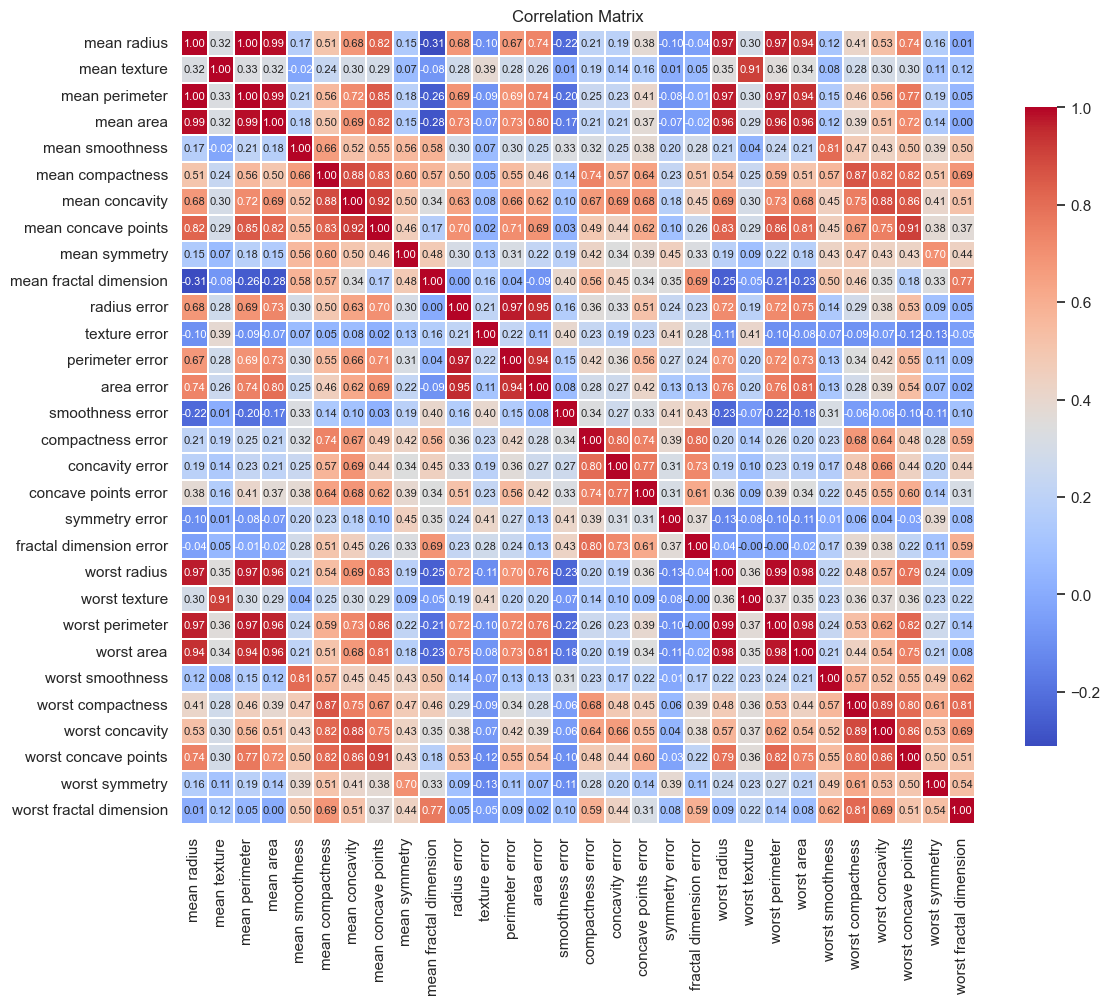

In [49]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cbar_kws={"shrink": .8}, cmap='coolwarm', linewidth=0.2, linecolor='white', square=True, 
            annot_kws={"size":8})
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [50]:
high_corr = corr_matrix[(corr_matrix > 0.9) & (corr_matrix < 1.0)].round(2)


rows, cols = high_corr.stack().index.to_frame(index=False).T.values

# Combine the rows, columns, and values into a DataFrame for better display
extracted_data_frame = pd.DataFrame({
    'Row': rows,
    'Column': cols,
    'Value': high_corr.stack().values
})

In [51]:
extracted_data_frame

,Row,Column,Value
0,mean radius,mean perimeter,1.00
1,mean radius,mean area,0.99
2,mean radius,worst radius,0.97
3,mean radius,worst perimeter,0.97
4,mean radius,worst area,0.94
5,mean texture,worst texture,0.91
6,mean perimeter,mean radius,1.00
7,mean perimeter,mean area,0.99
8,mean perimeter,worst radius,0.97
9,mean perimeter,worst perimeter,0.97


* The breast cancer dataset has several highly correlated features, especially around measurements like radius, perimeter, and area, indicating that these metrics might be redundant.

* Strong correlations exist between the mean and worst values of features, showing that mean values often predict extreme values well.

* Texture and concavity features also display high correlations, suggesting that changes in one are often mirrored in the other.

* Error metrics (like radius error and area error) are closely related, implying similar variance patterns across these measurements.

* To streamline the dataset, redundant features could be removed or combined, potentially improving model performance and interpretability without significant information loss.

# 2. Classification Algorithm Implementation 
_____

### Splitting data into Training and Testing Data.

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", y_train.shape)
print("Shape of Y_test:", y_test.shape)

Shape of X_train: (455, 30)
Shape of X_test: (114, 30)
Shape of Y_train: (455,)
Shape of Y_test: (114,)


# Model Training
_____

### Implement the following five classification algorithms:
#### 1. Logistic Regression
#### 2. Decision Tree Classifier
#### 3. Random Forest Classifier
#### 4. Support Vector Machine (SVM)
#### 5. k-Nearest Neighbors (k-NN)

## 1. Logistic Regression

Logistic Regression is a linear model used for binary classification problems.
It predicts the probability of the target variable belonging to a particular class.
The model uses the logistic function to map predicted values to probabilities between 0 and 1.
Logistic Regression is suitable for the breast cancer dataset as it is a binary classification problem (malignant or benign).
It is simple, interpretable, and performs well when the relationship between the features and the target is linear.

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [56]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train) 

LogisticRegression()

In [57]:
# Predictions
y_pred = logreg.predict(X_test)

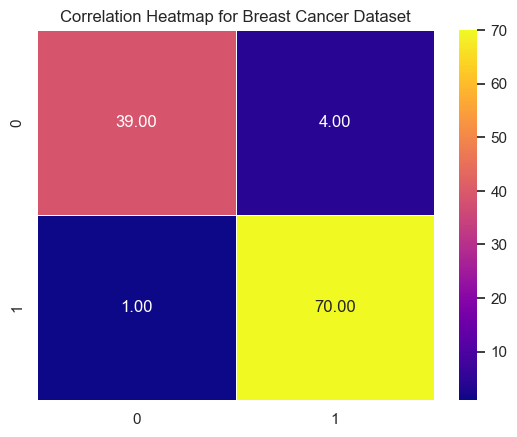

In [58]:
con = confusion_matrix(y_test, y_pred)
sns.heatmap(con, annot=True, fmt=".2f", cmap='plasma', linewidths=0.5)
plt.title('Correlation Heatmap for Breast Cancer Dataset')
plt.show()

In [59]:
cm =  confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
cm

Confusion matrix:


array([[39,  4],
       [ 1, 70]])

In [60]:
# Classification report
cr = classification_report(y_test, y_pred)
print("classification_report:")
cr

classification_report:


'              precision    recall  f1-score   support\n\n           0       0.97      0.91      0.94        43\n           1       0.95      0.99      0.97        71\n\n    accuracy                           0.96       114\n   macro avg       0.96      0.95      0.95       114\nweighted avg       0.96      0.96      0.96       114\n'

In [61]:
print(classification_report(y_test, y_pred, target_names=['M', 'B']))

              precision    recall  f1-score   support

           M       0.97      0.91      0.94        43
           B       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [62]:
# Accuracy score
logreg_accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy Score:")
print(logreg_accuracy)  

Logistic Regression Accuracy Score:
0.956140350877193


In [63]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

In [64]:
y_test.values

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

## 2. Decision Tree Classifier

Decision Trees are non-linear models that split the data into subsets based on the value of the features. 
Each node represents a decision based on a feature, and each branch represents the outcome of that decision.
Decision Trees are suitable for the breast cancer dataset as they can capture complex relationships between the features 
and the target. They are also easy to interpret and can handle both numerical and categorical data.

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [67]:
# Predictions
y_pred = decision_tree.predict(X_test)

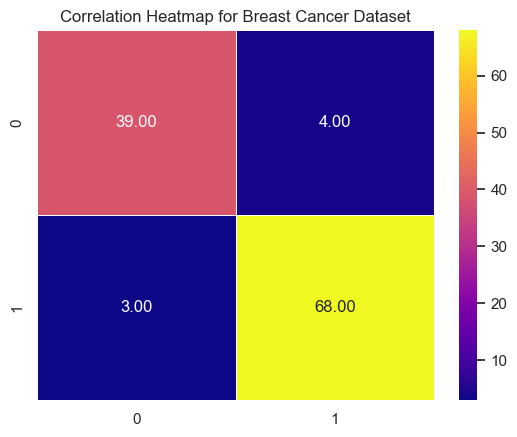

In [68]:
con = confusion_matrix(y_test, y_pred)
sns.heatmap(con, annot=True, fmt=".2f", cmap='plasma', linewidths=0.5)
plt.title('Correlation Heatmap for Breast Cancer Dataset')
plt.show()

In [69]:
cm =  confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
cm

Confusion matrix:


array([[39,  4],
       [ 3, 68]])

In [70]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.94      0.96      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [71]:
# Accuracy score
decision_tree_accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Classifier Accuracy Score:")
print(decision_tree_accuracy)                        

Decision Tree Classifier Accuracy Score:
0.9385964912280702


In [72]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0])

In [73]:
y_test.values

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

## 3. Random Forest Classifier

Random Forest is an ensemble method that combines multiple decision trees to improve the model's performance. 
It reduces overfitting by averaging the results of several trees.
Random Forest is suitable for the breast cancer dataset because it improves the accuracy and robustness of the model by 
combining multiple decision trees, thus capturing more complex relationships in the data.

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [76]:
# Predictions
y_pred = random_forest.predict(X_test)

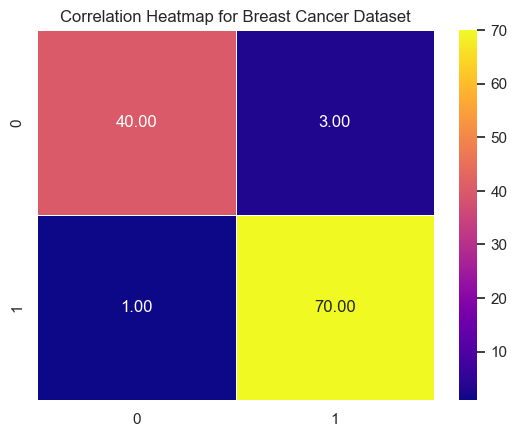

In [77]:
con = confusion_matrix(y_test, y_pred)
sns.heatmap(con, annot=True, fmt=".2f", cmap='plasma', linewidths=0.5)
plt.title('Correlation Heatmap for Breast Cancer Dataset')
plt.show()

In [78]:
cm =  confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
cm

Confusion matrix:


array([[40,  3],
       [ 1, 70]])

In [79]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [80]:
# Accuracy score
random_forest_accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Classifier Accuracy Score:")
print(random_forest_accuracy)   

Random Forest Classifier Accuracy Score:
0.9649122807017544


In [81]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [82]:
y_test.values

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

## 4. Support Vector Machine (SVM)

SVM is a powerful classification method that finds the hyperplane that best separates the data into different classes. 
It works well for both linear and non-linear data by using kernel functions.
SVM is suitable for the breast cancer dataset because it can handle high-dimensional spaces and complex decision 
boundaries, making it effective for datasets with many features like this one.

In [83]:
from sklearn.svm import SVC

In [84]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [85]:
# Predictions
y_pred = svm_model.predict(X_test)

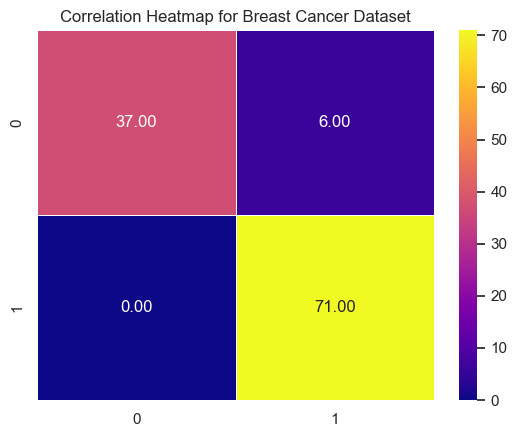

In [86]:
con = confusion_matrix(y_test, y_pred)
sns.heatmap(con, annot=True, fmt=".2f", cmap='plasma', linewidths=0.5)
plt.title('Correlation Heatmap for Breast Cancer Dataset')
plt.show()

In [87]:
cm =  confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
cm

Confusion matrix:


array([[37,  6],
       [ 0, 71]])

In [88]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.93        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [89]:
# Accuracy score
svm_accuracy = accuracy_score(y_test, y_pred)
print("Support Vector Machine Accuracy Score:")
print(svm_accuracy)                        

Support Vector Machine Accuracy Score:
0.9473684210526315


In [90]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [91]:
y_test.values

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

## 5. k-Nearest Neighbors (k-NN)

k-NN is a simple, instance-based learning algorithm that classifies a sample based on the majority class of its k-nearest neighbors. 
It uses distance metrics (e.g., Euclidean) to find the nearest neighbors.
k-NN is suitable for the breast cancer dataset because it is a simple and intuitive method that can capture local 
structures in the data. However, it may not perform well on high-dimensional data without proper feature scaling 
(which we have already done).

In [92]:
from sklearn.neighbors import KNeighborsClassifier

In [93]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [94]:
# Predictions
y_pred = knn_classifier.predict(X_test)

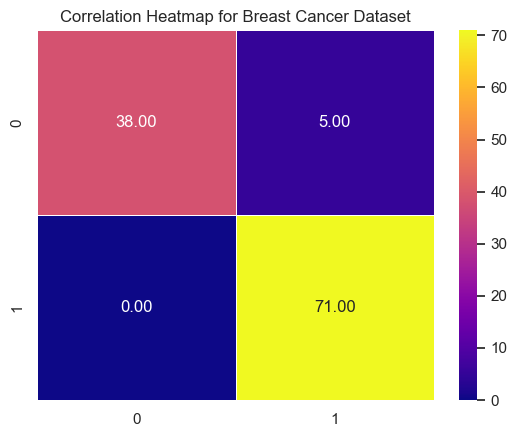

In [95]:
con = confusion_matrix(y_test, y_pred)
sns.heatmap(con, annot=True, fmt=".2f", cmap='plasma', linewidths=0.5)
plt.title('Correlation Heatmap for Breast Cancer Dataset')
plt.show()

In [96]:
cm =  confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
cm

Confusion matrix:


array([[38,  5],
       [ 0, 71]])

In [97]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        43
           1       0.93      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



In [98]:
# Accuracy score
knn_accuracy = accuracy_score(y_test, y_pred)
print("KNeighborsClassifier Accuracy Score:")
print(knn_accuracy)  

KNeighborsClassifier Accuracy Score:
0.956140350877193


In [99]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [100]:
y_test.values

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

# 3. Model Comparison

**Compare the performance of the five classification algorithms.**

In [101]:
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Decision Tree Accuracy:", decision_tree_accuracy)
print("Random Forest Accuracy:",random_forest_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("k-NN Accuracy:", knn_accuracy)

Logistic Regression Accuracy: 0.956140350877193
Decision Tree Accuracy: 0.9385964912280702
Random Forest Accuracy: 0.9649122807017544
SVM Accuracy: 0.9473684210526315
k-NN Accuracy: 0.956140350877193


**Which algorithm performed the best and which one performed the worst?**

In [102]:
# Create a dictionary to store model accuracies
model_accuracy = {
    'Logistic Regression Accuracy': logreg_accuracy,
    'Decision Tree Accuracy': decision_tree_accuracy,
    'Random Forest Accuracy': random_forest_accuracy,
    'SVM Accuracy': svm_accuracy,
    'k-NN Accuracy':knn_accuracy
}

In [103]:
# Create DataFrame
accuracy_df = pd.DataFrame(list(model_accuracy.items()), columns=['Model', 'Accuracy'])
accuracy_df

,Model,Accuracy
0,Logistic Regression Accuracy,0.956140
1,Decision Tree Accuracy,0.938596
2,Random Forest Accuracy,0.964912
3,SVM Accuracy,0.947368
4,k-NN Accuracy,0.956140


In [104]:
# Find the best and worst models
best_model = accuracy_df.loc[accuracy_df['Accuracy'].idxmax()]
worst_model = accuracy_df.loc[accuracy_df['Accuracy'].idxmin()]

In [105]:
# Print results
print(f"Best Model: {best_model['Model']} with Accuracy: {best_model['Accuracy']:.3f}")
print(f"Worst Model: {worst_model['Model']} with Accuracy: {worst_model['Accuracy']:.3f}")

Best Model: Random Forest Accuracy with Accuracy: 0.965
Worst Model: Decision Tree Accuracy with Accuracy: 0.939


# Conclusion:
_____


* The Random Forest algorithm performed the best, achieving the highest accuracy of 96.5%

* The Decision Tree algorithm performed the worst, with lowest accuracy of 93.9%

* This analysis gives an idea of which algorithm is most suitable for this dataset, considering both the performance and the characteristics of the data

______